In [1]:
!pip install --quiet pandas tabulate matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

In [4]:
k_values_full = [1, 3, 5, 10, 50, 100]

In [7]:
unencrypted_subset_data = {
    "nfcorpus_subset": {
        "Total_Ingestion_Time_s": 6.27,
        "Estimated_Embedding_Size_MB": 1.04,
        "Avg_Search_Latency_ms": 72.75,
        "P90_Search_Latency_ms": 93.41,
        "P99_Search_Latency_ms": 93.41,
        "Num_Documents": 713,
        "NDCG@k": {'NDCG@1': 0.50000, 'NDCG@3': 0.41707, 'NDCG@5': 0.39350, 'NDCG@10': 0.34619, 'NDCG@50': 0.28823, 'NDCG@100': 0.30974},
        "MAP@k": {'MAP@1': 0.02509, 'MAP@3': 0.03785, 'MAP@5': 0.04742, 'MAP@10': 0.05803, 'MAP@50': 0.10171, 'MAP@100': 0.12431},
        "Recall@k": {'Recall@1': 0.02509, 'Recall@3': 0.03966, 'Recall@5': 0.05272, 'Recall@10': 0.07230, 'Recall@50': 0.20476, 'Recall@100': 0.28061},
        "Precision@k": {'P@1': 0.56250, 'P@3': 0.43750, 'P@5': 0.40000, 'P@10': 0.30625, 'P@50': 0.19250, 'P@100': 0.15625}
    },
    "fiqa_subset": {
        "Total_Ingestion_Time_s": 1.18,
        "Estimated_Embedding_Size_MB": 0.15,
        "Avg_Search_Latency_ms": 65.43,
        "P90_Search_Latency_ms": 58.67,
        "P99_Search_Latency_ms": 282.04,
        "Num_Documents": 100,
        "NDCG@k": {'NDCG@1': 0.84375, 'NDCG@3': 0.88163, 'NDCG@5': 0.88678, 'NDCG@10': 0.89197, 'NDCG@50': 0.90637, 'NDCG@100': 0.90780},
        "MAP@k": {'MAP@1': 0.42356, 'MAP@3': 0.71252, 'MAP@5': 0.79361, 'MAP@10': 0.83473, 'MAP@50': 0.84885, 'MAP@100': 0.84918},
        "Recall@k": {'Recall@1': 0.42356, 'Recall@3': 0.79152, 'Recall@5': 0.88157, 'Recall@10': 0.93976, 'Recall@50': 0.99479, 'Recall@100': 1.00000},
        "Precision@k": {'P@1': 0.84375, 'P@3': 0.62500, 'P@5': 0.47500, 'P@10': 0.27812, 'P@50': 0.06188, 'P@100': 0.03125}
    },
    "scidocs_subset": {
        "Total_Ingestion_Time_s": 2.01,
        "Estimated_Embedding_Size_MB": 0.35,
        "Avg_Search_Latency_ms": 67.59,
        "P90_Search_Latency_ms": 79.49,
        "P99_Search_Latency_ms": 79.49,
        "Num_Documents": 241,
        "NDCG@k": {'NDCG@1': 0.86000, 'NDCG@3': 0.78715, 'NDCG@5': 0.68011, 'NDCG@10': 0.75800, 'NDCG@50': 0.82687, 'NDCG@100': 0.83681},
        "MAP@k": {'MAP@1': 0.17400, 'MAP@3': 0.43917, 'MAP@5': 0.56917, 'MAP@10': 0.63877, 'MAP@50': 0.67856, 'MAP@100': 0.68096},
        "Recall@k": {'Recall@1': 0.17400, 'Recall@3': 0.46300, 'Recall@5': 0.61700, 'Recall@10': 0.75800, 'Recall@50': 0.93500, 'Recall@100': 0.97100},
        "Precision@k": {'P@1': 0.86000, 'P@3': 0.76000, 'P@5': 0.60800, 'P@10': 0.37400, 'P@50': 0.09240, 'P@100': 0.04800}
    }
}

# DCPE Encrypted - 5% Subset
dcpe_subset_data = {
    "nfcorpus_subset": {
        "Total_Ingestion_Time_s": 5.78,
        "Estimated_Embedding_Size_MB": 1.13,
        "Avg_Search_Latency_ms": 45.46,
        "P90_Search_Latency_ms": 58.51,
        "P99_Search_Latency_ms": 58.51,
        "Num_Documents": 713,
        "NDCG@k": {'NDCG@1': 0.50000, 'NDCG@3': 0.45024, 'NDCG@5': 0.41042, 'NDCG@10': 0.35733, 'NDCG@50': 0.29315, 'NDCG@100': 0.31349},
        "MAP@k": {'MAP@1': 0.02509, 'MAP@3': 0.04175, 'MAP@5': 0.05256, 'MAP@10': 0.06288, 'MAP@50': 0.10639, 'MAP@100': 0.12769},
        "Recall@k": {'Recall@1': 0.02509, 'Recall@3': 0.04437, 'Recall@5': 0.05739, 'Recall@10': 0.07413, 'Recall@50': 0.20461, 'Recall@100': 0.27879},
        "Precision@k": {'P@1': 0.56250, 'P@3': 0.47917, 'P@5': 0.41250, 'P@10': 0.31250, 'P@50': 0.19250, 'P@100': 0.15437}
    },
    "fiqa_subset": {
        "Total_Ingestion_Time_s": 0.87,
        "Estimated_Embedding_Size_MB": 0.16,
        "Avg_Search_Latency_ms": 43.51,
        "P90_Search_Latency_ms": 35.52,
        "P99_Search_Latency_ms": 179.83,
        "Num_Documents": 100,
        "NDCG@k": {'NDCG@1': 0.87500, 'NDCG@3': 0.88801, 'NDCG@5': 0.90357, 'NDCG@10': 0.91206, 'NDCG@50': 0.92124, 'NDCG@100': 0.92268},
        "MAP@k": {'MAP@1': 0.45481, 'MAP@3': 0.72815, 'MAP@5': 0.81341, 'MAP@10': 0.85774, 'MAP@50': 0.86934, 'MAP@100': 0.86968},
        "Recall@k": {'Recall@1': 0.45481, 'Recall@3': 0.77589, 'Recall@5': 0.89199, 'Recall@10': 0.95538, 'Recall@50': 0.99479, 'Recall@100': 1.00000},
        "Precision@k": {'P@1': 0.87500, 'P@3': 0.61458, 'P@5': 0.47500, 'P@10': 0.28125, 'P@50': 0.06188, 'P@100': 0.03125}
    },
    "scidocs_subset": {
        "Total_Ingestion_Time_s": 1.75,
        "Estimated_Embedding_Size_MB": 0.38,
        "Avg_Search_Latency_ms": 37.96,
        "P90_Search_Latency_ms": 58.40,
        "P99_Search_Latency_ms": 58.40,
        "Num_Documents": 241,
        "NDCG@k": {'NDCG@1': 0.92000, 'NDCG@3': 0.77877, 'NDCG@5': 0.69678, 'NDCG@10': 0.75923, 'NDCG@50': 0.83250, 'NDCG@100': 0.84468},
        "MAP@k": {'MAP@1': 0.18600, 'MAP@3': 0.43333, 'MAP@5': 0.58713, 'MAP@10': 0.64440, 'MAP@50': 0.68562, 'MAP@100': 0.68865},
        "Recall@k": {'Recall@1': 0.18600, 'Recall@3': 0.44600, 'Recall@5': 0.63200, 'Recall@10': 0.74500, 'Recall@50': 0.93100, 'Recall@100': 0.97500},
        "Precision@k": {'P@1': 0.92000, 'P@3': 0.73333, 'P@5': 0.62400, 'P@10': 0.36800, 'P@50': 0.09200, 'P@100': 0.04820}
    }
}

# S-KNN Encrypted - 5% Subset
sknn_subset_data = {
    "nfcorpus_subset": {
        "Total_Ingestion_Time_s": 21.53,
        "Estimated_Embedding_Size_MB": 1.04,
        "Avg_Search_Latency_ms": 42.40,
        "P90_Search_Latency_ms": 45.12,
        "P99_Search_Latency_ms": 45.12,
        "Num_Documents": 713,
        "NDCG@k": {'NDCG@1': 0.50000, 'NDCG@3': 0.41707, 'NDCG@5': 0.39350, 'NDCG@10': 0.34619, 'NDCG@50': 0.28823, 'NDCG@100': 0.30974},
        "MAP@k": {'MAP@1': 0.02509, 'MAP@3': 0.03785, 'MAP@5': 0.04742, 'MAP@10': 0.05803, 'MAP@50': 0.10171, 'MAP@100': 0.12431},
        "Recall@k": {'Recall@1': 0.02509, 'Recall@3': 0.03966, 'Recall@5': 0.05272, 'Recall@10': 0.07230, 'Recall@50': 0.20476, 'Recall@100': 0.28061},
        "Precision@k": {'P@1': 0.56250, 'P@3': 0.43750, 'P@5': 0.40000, 'P@10': 0.30625, 'P@50': 0.19250, 'P@100': 0.15625}
    },
    "fiqa_subset": {
        "Total_Ingestion_Time_s": 2.35,
        "Estimated_Embedding_Size_MB": 0.15,
        "Avg_Search_Latency_ms": 47.42,
        "P90_Search_Latency_ms": 49.38,
        "P99_Search_Latency_ms": 162.06,
        "Num_Documents": 100,
        "NDCG@k": {'NDCG@1': 0.84375, 'NDCG@3': 0.88163, 'NDCG@5': 0.88678, 'NDCG@10': 0.89197, 'NDCG@50': 0.90637, 'NDCG@100': 0.90780},
        "MAP@k": {'MAP@1': 0.42356, 'MAP@3': 0.71252, 'MAP@5': 0.79361, 'MAP@10': 0.83473, 'MAP@50': 0.84885, 'MAP@100': 0.84918},
        "Recall@k": {'Recall@1': 0.42356, 'Recall@3': 0.79152, 'Recall@5': 0.88157, 'Recall@10': 0.93976, 'Recall@50': 0.99479, 'Recall@100': 1.00000},
        "Precision@k": {'P@1': 0.84375, 'P@3': 0.62500, 'P@5': 0.47500, 'P@10': 0.27812, 'P@50': 0.06188, 'P@100': 0.03125}
    },
    "scidocs_subset": {
        "Total_Ingestion_Time_s": 7.11,
        "Estimated_Embedding_Size_MB": 0.35,
        "Avg_Search_Latency_ms": 43.98,
        "P90_Search_Latency_ms": 49.20,
        "P99_Search_Latency_ms": 49.20,
        "Num_Documents": 241,
        "NDCG@k": {'NDCG@1': 0.86000, 'NDCG@3': 0.78715, 'NDCG@5': 0.68011, 'NDCG@10': 0.75800, 'NDCG@50': 0.82687, 'NDCG@100': 0.83681},
        "MAP@k": {'MAP@1': 0.17400, 'MAP@3': 0.43917, 'MAP@5': 0.56917, 'MAP@10': 0.63877, 'MAP@50': 0.67856, 'MAP@100': 0.68096},
        "Recall@k": {'Recall@1': 0.17400, 'Recall@3': 0.46300, 'Recall@5': 0.61700, 'Recall@10': 0.75800, 'Recall@50': 0.93500, 'Recall@100': 0.97100},
        "Precision@k": {'P@1': 0.86000, 'P@3': 0.76000, 'P@5': 0.60800, 'P@10': 0.37400, 'P@50': 0.09240, 'P@100': 0.04800}
    }
}

# Paillier Encrypted - 5% Subset
paillier_subset_data = {
    "nfcorpus_subset": {
        "Total_Ingestion_Time_s": 4050.31,
        "Estimated_Embedding_Size_MB": 1.04,
        "Avg_Search_Latency_ms": 50.76,
        "P90_Search_Latency_ms": 70.30,
        "P99_Search_Latency_ms": 70.30,
        "Num_Documents": 713,
        "NDCG@k": {'NDCG@1': 0.06250, 'NDCG@3': 0.06634, 'NDCG@5': 0.07440, 'NDCG@10': 0.06528, 'NDCG@50': 0.07390, 'NDCG@100': 0.08900},
        "MAP@k": {'MAP@1': 0.00020, 'MAP@3': 0.00071, 'MAP@5': 0.00131, 'MAP@10': 0.00208, 'MAP@50': 0.00732, 'MAP@100': 0.01199},
        "Recall@k": {'Recall@1': 0.00020, 'Recall@3': 0.00101, 'Recall@5': 0.00255, 'Recall@10': 0.00594, 'Recall@50': 0.05859, 'Recall@100': 0.09970},
        "Precision@k": {'P@1': 0.06250, 'P@3': 0.06250, 'P@5': 0.07500, 'P@10': 0.06250, 'P@50': 0.06750, 'P@100': 0.06313}
    },
    "fiqa_subset": {
        "Total_Ingestion_Time_s": 566.45,
        "Estimated_Embedding_Size_MB": 0.15,
        "Avg_Search_Latency_ms": 55.45,
        "P90_Search_Latency_ms": 52.99,
        "P99_Search_Latency_ms": 199.22,
        "Num_Documents": 100,
        "NDCG@k": {'NDCG@1': 0.03125, 'NDCG@3': 0.03158, 'NDCG@5': 0.04167, 'NDCG@10': 0.06247, 'NDCG@50': 0.19222, 'NDCG@100': 0.28429},
        "MAP@k": {'MAP@1': 0.00625, 'MAP@3': 0.01319, 'MAP@5': 0.02069, 'MAP@10': 0.02713, 'MAP@50': 0.05212, 'MAP@100': 0.06893},
        "Recall@k": {'Recall@1': 0.00625, 'Recall@3': 0.02708, 'Recall@5': 0.06458, 'Recall@10': 0.10781, 'Recall@50': 0.60079, 'Recall@100': 1.00000},
        "Precision@k": {'P@1': 0.03125, 'P@3': 0.03125, 'P@5': 0.03125, 'P@10': 0.03125, 'P@50': 0.03375, 'P@100': 0.03125}
    },
    "scidocs_subset": {
        "Total_Ingestion_Time_s": 1363.92,
        "Estimated_Embedding_Size_MB": 0.35,
        "Avg_Search_Latency_ms": 41.27,
        "P90_Search_Latency_ms": 51.66,
        "P99_Search_Latency_ms": 51.66,
        "Num_Documents": 241,
        "NDCG@k": {'NDCG@1': 0.02000, 'NDCG@3': 0.01877, 'NDCG@5': 0.01951, 'NDCG@10': 0.02391, 'NDCG@50': 0.07988, 'NDCG@100': 0.14020},
        "MAP@k": {'MAP@1': 0.00400, 'MAP@3': 0.00667, 'MAP@5': 0.00867, 'MAP@10': 0.00974, 'MAP@50': 0.01843, 'MAP@100': 0.02526},
        "Recall@k": {'Recall@1': 0.00400, 'Recall@3': 0.01200, 'Recall@5': 0.02100, 'Recall@10': 0.02900, 'Recall@50': 0.19000, 'Recall@100': 0.41200},
        "Precision@k": {'P@1': 0.02000, 'P@3': 0.02000, 'P@5': 0.02000, 'P@10': 0.01400, 'P@50': 0.01840, 'P@100': 0.02020}
    }
}

# Consolidate all data for easy processing
all_methods_subset_data = {
    "Unencrypted": unencrypted_subset_data,
    "DCPE": dcpe_subset_data,
    "S-KNN": sknn_subset_data, # Include S-KNN from your previous output
    "Paillier": paillier_subset_data
}

# Define k-values for evaluation (consistent with full dataset)
k_values_subset = [1, 3, 5, 10, 50, 100]

# ====================================================================================================
# Data Aggregation and Table Generation
# ====================================================================================================

# --- 1. Summary Table of Key Performance Indicators (KPIs) ---
summary_rows = []
for encryption_type, datasets_data in all_methods_subset_data.items():
    for dataset_name, metrics in datasets_data.items():
        row = {
            "Encryption Method": encryption_type,
            "Dataset": dataset_name.replace("_subset", ""), # Clean up dataset name for table
            "NDCG@10": metrics["NDCG@k"].get("NDCG@10", float('nan')),
            "MAP@10": metrics["MAP@k"].get("MAP@10", float('nan')),
            "Recall@100": metrics["Recall@k"].get("Recall@100", float('nan')),
            "P@10": metrics["Precision@k"].get("P@10", float('nan')),
            "Ingestion Time (s)": metrics["Total_Ingestion_Time_s"],
            "Storage Size (MB)": metrics["Estimated_Embedding_Size_MB"],
            "Avg Latency (ms)": metrics["Avg_Search_Latency_ms"],
            "P90 Latency (ms)": metrics["P90_Search_Latency_ms"],
            "P99 Latency (ms)": metrics["P99_Search_Latency_ms"],
        }
        summary_rows.append(row)

summary_df_subset = pd.DataFrame(summary_rows)

print("### Table 1: Summary of Key Performance Indicators (5% Subsets) ###")
print("Metrics are rounded to 4 decimal places. Time and Size are as reported.")
print(summary_df_subset.round(4).to_markdown(index=False))

# --- 2. Detailed BEIR Metrics Tables ---
metric_types = ["NDCG", "MAP", "Recall", "Precision"]

for metric_type in metric_types:
    print(f"\n### Table 2.{metric_types.index(metric_type) + 1}: {metric_type} Scores Across Encryption Methods and Datasets (5% Subsets) ###")
    
    detailed_rows = []
    for encryption_type, datasets_data in all_methods_subset_data.items():
        for dataset_name, metrics in datasets_data.items():
            row = {
                "Encryption Method": encryption_type,
                "Dataset": dataset_name.replace("_subset", "")
            }
            scores_dict = metrics[f"{metric_type}@k"] if metric_type != "Precision" else metrics["Precision@k"]
            
            for k_val in k_values_subset:
                key = f"{metric_type}@{k_val}" if metric_type != "Precision" else f"P@{k_val}"
                row[key] = scores_dict.get(key, float('nan'))
            detailed_rows.append(row)
    
    detailed_df_subset = pd.DataFrame(detailed_rows)
    print(detailed_df_subset.round(4).to_markdown(index=False))

# --- 3. Operational Metrics Detailed Table ---
print("\n### Table 3: Operational Performance Metrics (5% Subsets) ###")

operational_rows = []
for encryption_type, datasets_data in all_methods_subset_data.items():
    for dataset_name, metrics in datasets_data.items():
        row = {
            "Encryption Method": encryption_type,
            "Dataset": dataset_name.replace("_subset", ""),
            "Ingestion Time (s)": metrics["Total_Ingestion_Time_s"],
            "Storage Size (MB)": metrics["Estimated_Embedding_Size_MB"],
            "Num Documents": metrics["Num_Documents"],
            "Avg Latency (ms)": metrics["Avg_Search_Latency_ms"],
            "P90 Latency (ms)": metrics["P90_Search_Latency_ms"],
            "P99 Latency (ms)": metrics["P99_Search_Latency_ms"],
        }
        operational_rows.append(row)

operational_df_subset = pd.DataFrame(operational_rows)
print(operational_df_subset.round(4).to_markdown(index=False))

### Table 1: Summary of Key Performance Indicators (5% Subsets) ###
Metrics are rounded to 4 decimal places. Time and Size are as reported.
| Encryption Method   | Dataset   |   NDCG@10 |   MAP@10 |   Recall@100 |   P@10 |   Ingestion Time (s) |   Storage Size (MB) |   Avg Latency (ms) |   P90 Latency (ms) |   P99 Latency (ms) |
|:--------------------|:----------|----------:|---------:|-------------:|-------:|---------------------:|--------------------:|-------------------:|-------------------:|-------------------:|
| Unencrypted         | nfcorpus  |    0.3462 |   0.058  |       0.2806 | 0.3062 |                 6.27 |                1.04 |              72.75 |              93.41 |              93.41 |
| Unencrypted         | fiqa      |    0.892  |   0.8347 |       1      | 0.2781 |                 1.18 |                0.15 |              65.43 |              58.67 |             282.04 |
| Unencrypted         | scidocs   |    0.758  |   0.6388 |       0.971  | 0.374  |              

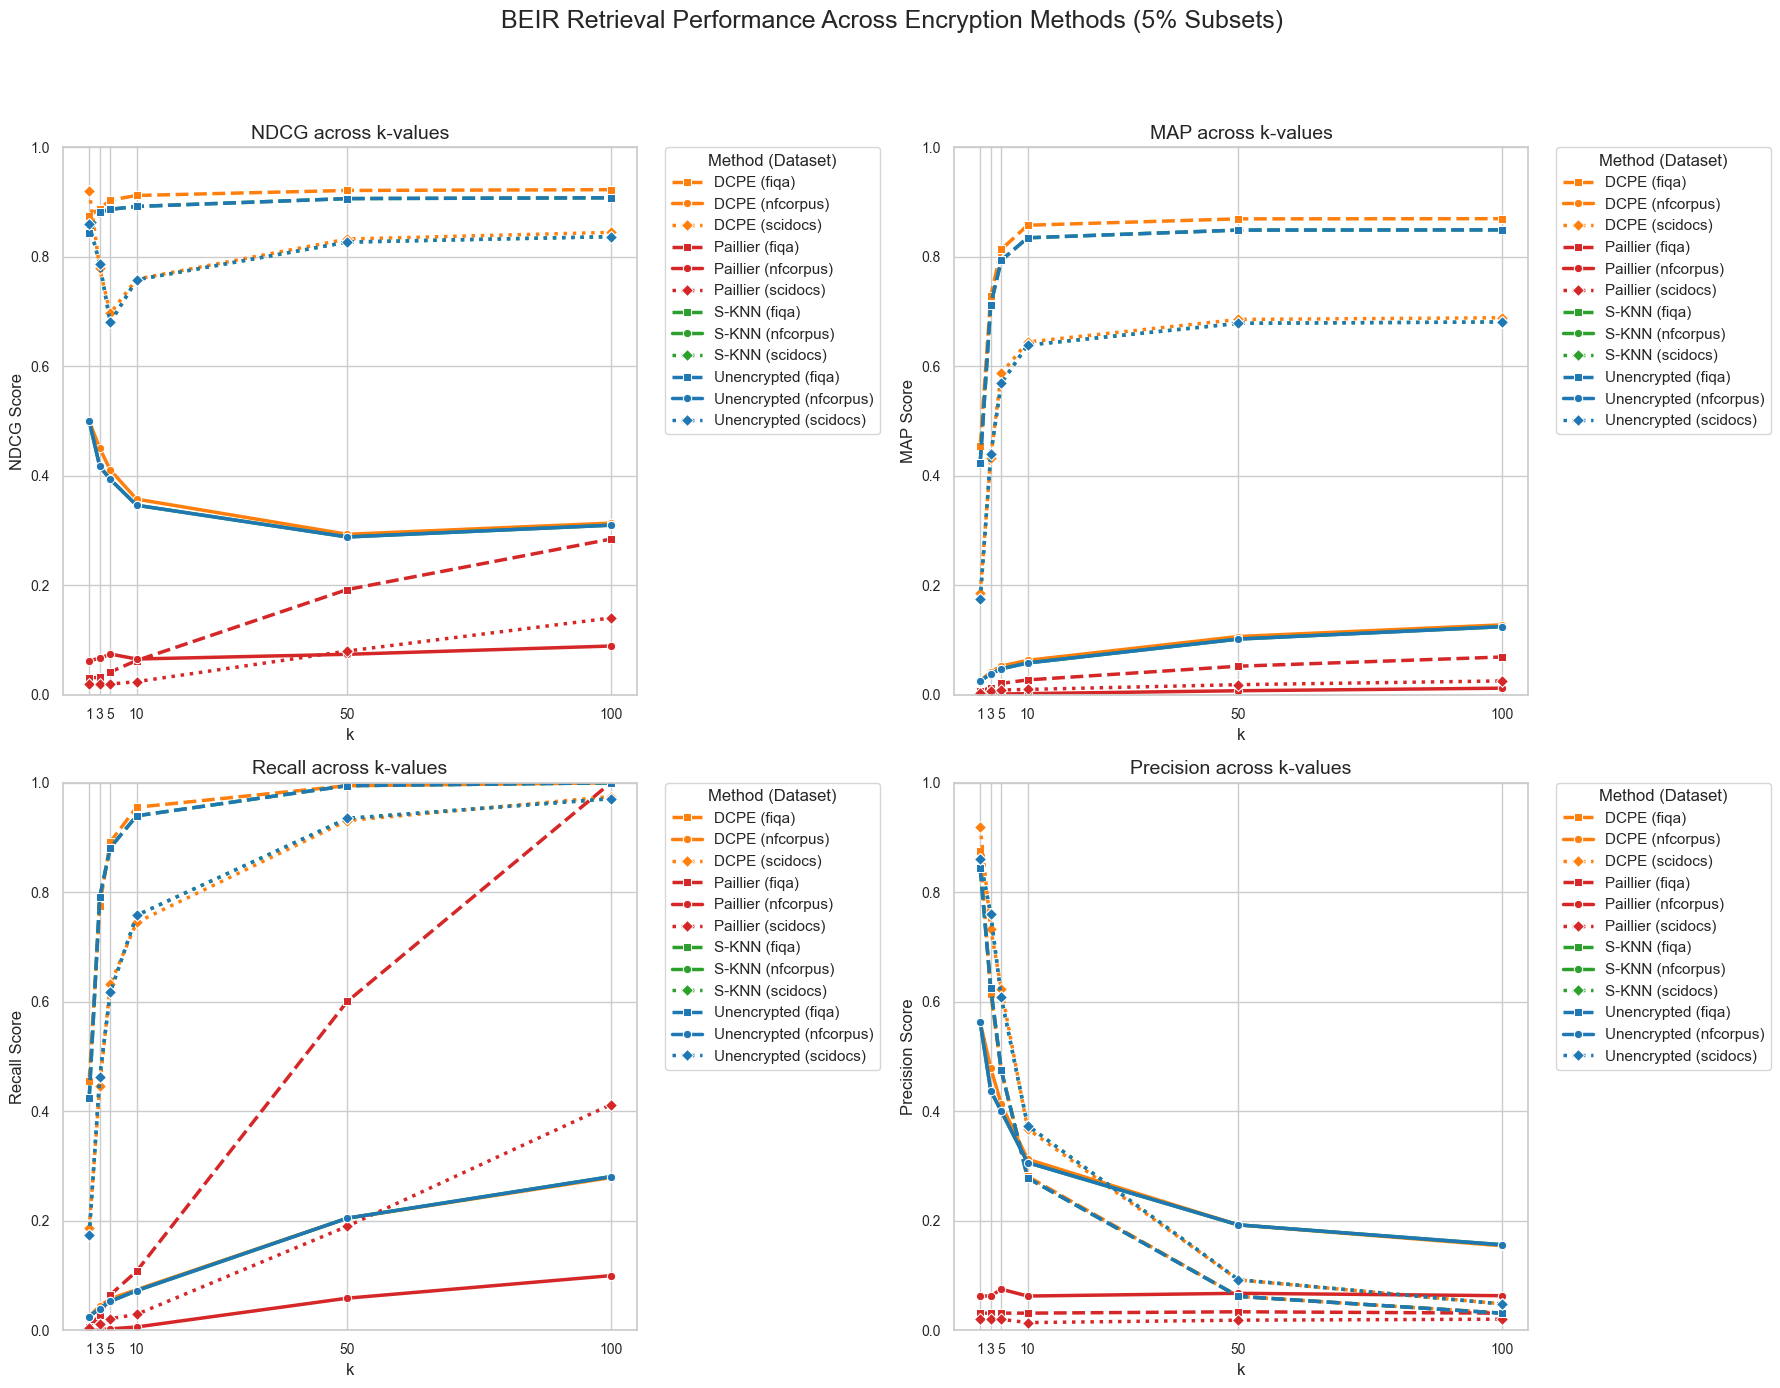

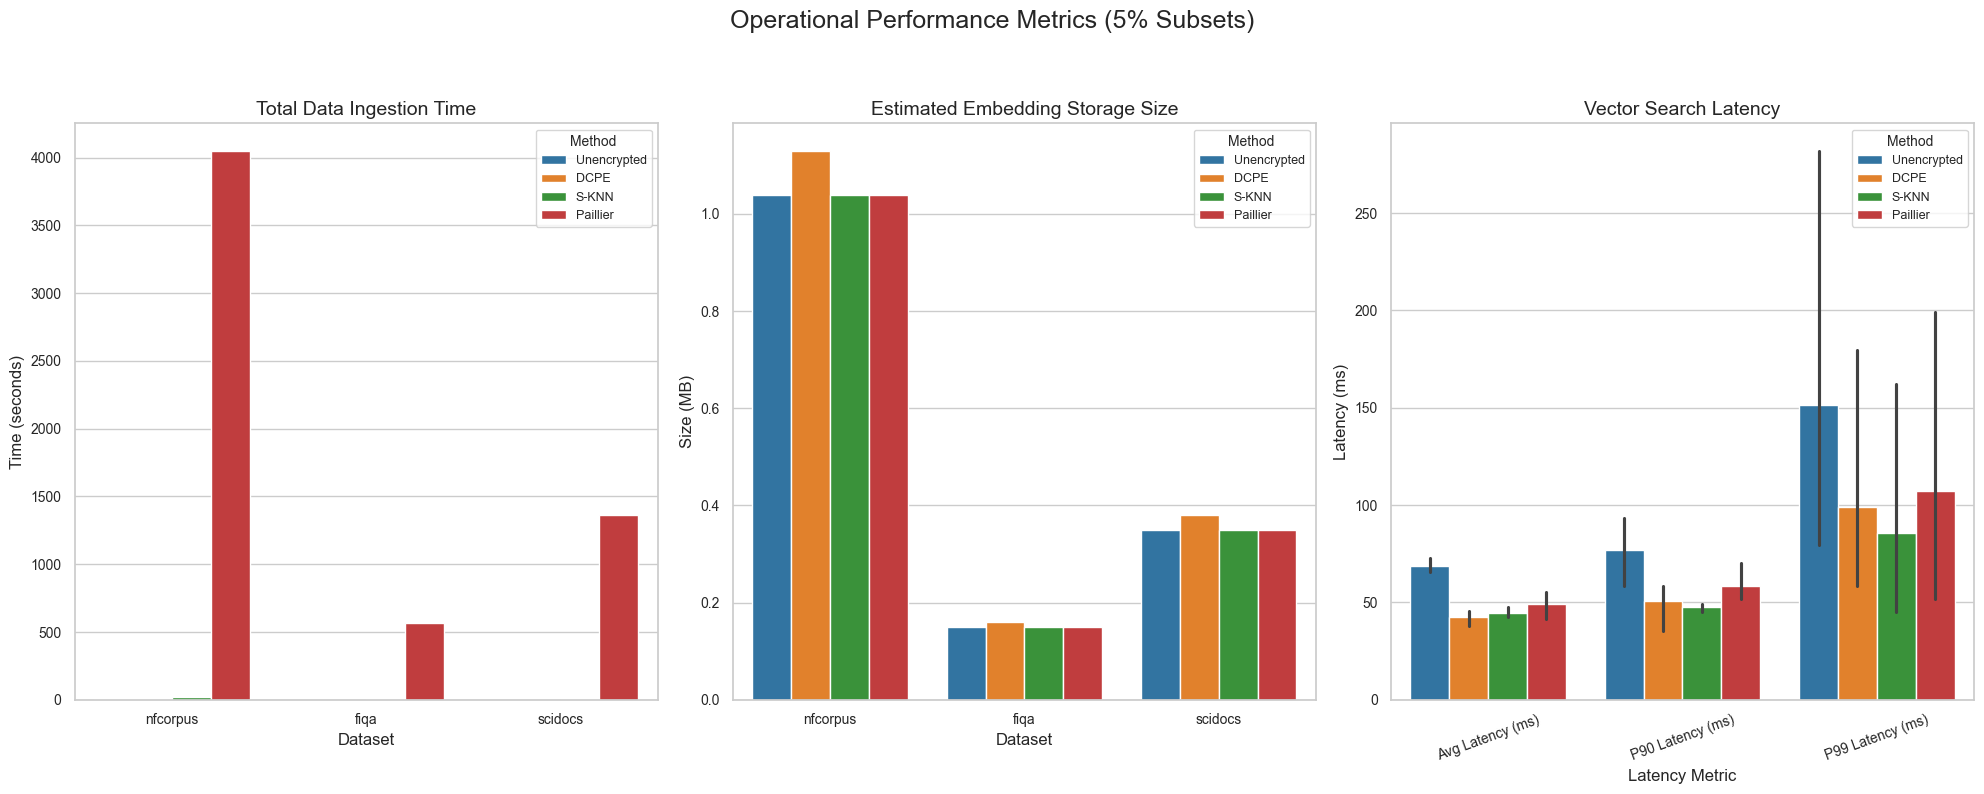

In [6]:
# Set a professional style for plots
sns.set_theme(style="whitegrid")

# Define a more contrasting palette for Encryption Method
method_colors = sns.color_palette("tab10", n_colors=len(all_methods_subset_data))
dataset_linestyles = {'nfcorpus': '-', 'fiqa': '--', 'scidocs': ':'}
dataset_markers = {'nfcorpus': 'o', 'fiqa': 's', 'scidocs': 'D'}
method_names_ordered = list(all_methods_subset_data.keys()) # To ensure consistent color mapping

# Prepare beir_plot_df for visualization from all_methods_subset_data (re-created here for standalone script)
beir_plot_data_subset = []
for encryption_type, datasets_data in all_methods_subset_data.items():
    for dataset_name_raw, metrics in datasets_data.items():
        dataset_name_clean = dataset_name_raw.replace("_subset", "")
        for metric_type_str, scores_dict in [
            ("NDCG", metrics["NDCG@k"]),
            ("MAP", metrics["MAP@k"]),
            ("Recall", metrics["Recall@k"]),
            ("Precision", metrics["Precision@k"])
        ]:
            for k_str, score in scores_dict.items():
                k_val = int(k_str.split('@')[-1])
                beir_plot_data_subset.append({
                    "Encryption Method": encryption_type,
                    "Dataset": dataset_name_clean,
                    "Metric Type": metric_type_str,
                    "k": k_val,
                    "Score": score
                })
beir_plot_df_subset = pd.DataFrame(beir_plot_data_subset)


# --- 1. Relevance Metrics Comparison (Line Plots) ---
plt.figure(figsize=(18, 14))
plt.suptitle("BEIR Retrieval Performance Across Encryption Methods (5% Subsets)", fontsize=18, y=1.02)

metrics_for_plotting = [
    ("NDCG", "NDCG Score"),
    ("MAP", "MAP Score"),
    ("Recall", "Recall Score"),
    ("Precision", "Precision Score")
]

for i, (metric_type, ylabel) in enumerate(metrics_for_plotting):
    ax = plt.subplot(2, 2, i + 1)
    
    current_metric_df = beir_plot_df_subset[beir_plot_df_subset['Metric Type'] == metric_type].copy()
    
    for (method, dataset), group in current_metric_df.groupby(['Encryption Method', 'Dataset']):
        color_idx = method_names_ordered.index(method)
        sns.lineplot(
            x="k",
            y="Score",
            data=group,
            color=method_colors[color_idx],
            linestyle=dataset_linestyles[dataset],
            marker=dataset_markers[dataset],
            label=f"{method} ({dataset})",
            ax=ax,
            linewidth=2.5
        )
    
    ax.set_title(f"{metric_type} across k-values", fontsize=14)
    ax.set_xlabel("k", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_ylim(0, 1.0)
    ax.set_xticks(k_values_subset)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.legend(title="Method (Dataset)", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# --- 2. Operational Metrics Comparison (Bar Plots) ---
plt.figure(figsize=(20, 8))
plt.suptitle("Operational Performance Metrics (5% Subsets)", fontsize=18, y=1.02)

# Use the same contrasting palette for methods in bar plots
bar_palette = method_colors

# 2.1. Ingestion Time
ax1 = plt.subplot(1, 3, 1)
sns.barplot(
    x="Dataset",
    y="Ingestion Time (s)",
    hue="Encryption Method",
    data=operational_df_subset,
    ax=ax1,
    palette=bar_palette
)
ax1.set_title("Total Data Ingestion Time", fontsize=14)
ax1.set_ylabel("Time (seconds)", fontsize=12)
ax1.set_xlabel("Dataset", fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.legend(title="Method", fontsize=9, title_fontsize=10)

# 2.2. Storage Size
ax2 = plt.subplot(1, 3, 2)
sns.barplot(
    x="Dataset",
    y="Storage Size (MB)",
    hue="Encryption Method",
    data=operational_df_subset,
    ax=ax2,
    palette=bar_palette
)
ax2.set_title("Estimated Embedding Storage Size", fontsize=14)
ax2.set_ylabel("Size (MB)", fontsize=12)
ax2.set_xlabel("Dataset", fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.legend(title="Method", fontsize=9, title_fontsize=10)


# 2.3. Search Latency (Avg, P90, P99)
ax3 = plt.subplot(1, 3, 3)
latency_melted_df = operational_df_subset.melt(
    id_vars=['Dataset', 'Encryption Method'],
    value_vars=["Avg Latency (ms)", "P90 Latency (ms)", "P99 Latency (ms)"],
    var_name="Latency Type",
    value_name="Latency (ms)"
)
sns.barplot(
    x="Latency Type",
    y="Latency (ms)",
    hue="Encryption Method",
    data=latency_melted_df,
    ax=ax3,
    palette=bar_palette
)
ax3.set_title("Vector Search Latency", fontsize=14)
ax3.set_ylabel("Latency (ms)", fontsize=12)
ax3.set_xlabel("Latency Metric", fontsize=12)
ax3.tick_params(axis='x', rotation=20, labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.legend(title="Method", fontsize=9, title_fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()